# Multiple Project Operations

In [ ]:
# =============================================================================
# DEVELOPMENT MODE TOGGLE
# =============================================================================
USE_LOCAL_SOURCE = False  # <-- TOGGLE THIS

if USE_LOCAL_SOURCE:
    import sys
    from pathlib import Path
    local_path = str(Path.cwd().parent)
    if local_path not in sys.path:
        sys.path.insert(0, local_path)
    print(f"📁 LOCAL SOURCE MODE: Loading from {local_path}/ras_commander")
else:
    print("📦 PIP PACKAGE MODE: Loading installed ras-commander")

# Import ras-commander
from ras_commander import *

# Additional imports
import os
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import psutil  # For getting system CPU info
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import subprocess
import shutil

# Verify which version loaded
import ras_commander
print(f"✓ Loaded: {ras_commander.__file__}")

In [4]:
# Define computation output paths
bald_eagle_compute_folder = examples_dir / "compute_bald_eagle"
muncie_compute_folder = examples_dir / "compute_muncie"

# Check system resources
cpu_count = psutil.cpu_count(logical=True)
physical_cpu_count = psutil.cpu_count(logical=False)
available_memory_gb = psutil.virtual_memory().available / (1024**3)

print(f"System Resources:")
print(f"- {physical_cpu_count} physical CPU cores ({cpu_count} logical cores)")
print(f"- {available_memory_gb:.1f} GB available memory")
print(f"For multiple HEC-RAS projects, a good rule of thumb is:")
print(f"- Assign 2-4 cores per project")
print(f"- Allocate at least 2-4 GB of RAM per project")
print(f"Based on your system, you could reasonably run {min(physical_cpu_count//2, int(available_memory_gb//3))} projects simultaneously.")

System Resources:
- 8 physical CPU cores (8 logical cores)
- 13.4 GB available memory
For multiple HEC-RAS projects, a good rule of thumb is:
- Assign 2-4 cores per project
- Allocate at least 2-4 GB of RAM per project
Based on your system, you could reasonably run 4 projects simultaneously.


## Understanding Multiple RAS Project Management

When working with multiple HEC-RAS projects in RAS Commander, there are two important concepts to understand:

1. **The Global 'ras' Object**: By default, RAS Commander maintains a global `ras` object that represents the currently active project. This is convenient for simple scripts.

2. **Custom RAS Objects**: For multiple projects, you'll create separate RAS objects for each project. These custom objects store project-specific data and are passed to RAS Commander functions using the `ras_object` parameter.

### Best Practices for Multiple Project Management

- **Name Your Objects Clearly**: Use descriptive variable names for your RAS objects (e.g., `bald_eagle_ras`, `muncie_ras`)
- **Be Consistent**: Always pass the appropriate RAS object to functions when working with multiple projects
- **Avoid Using Global 'ras'**: When working with multiple projects, avoid using the global `ras` object to prevent confusion
- **Separate Compute Folders**: Use separate computation folders for each project
- **Manage Resources**: Be mindful of CPU and memory usage when running multiple projects in parallel

## Downloading and Extracting Example HEC-RAS Projects

We'll use the `RasExamples` class to download and extract two example HEC-RAS projects: "Balde Eagle Creek" and "Muncie".

In [5]:
# Extract the example projects (use same output path as cell 4)
# RasExamples handles extraction - no need to manually delete the directory
ras_examples = RasExamples()
extracted_paths = ras_examples.extract_project(
    ["Balde Eagle Creek", "Muncie"],
    output_path="example_projects_04_multiple_project_operations"
)
print(f"Extracted projects to:")
for path in extracted_paths:
    print(f"- {path}")

# Update examples_dir to match
examples_dir = extracted_paths[0].parent

# Verify the paths exist
print(f"Bald Eagle Creek project exists: {bald_eagle_path.exists()}")
print(f"Muncie project exists: {muncie_path.exists()}")

2025-11-17 13:31:42 - ras_commander.RasExamples - INFO - ----- RasExamples Extracting Project -----


2025-11-17 13:31:42 - ras_commander.RasExamples - INFO - Extracting project 'Balde Eagle Creek'


2025-11-17 13:31:42 - ras_commander.RasExamples - INFO - Successfully extracted project 'Balde Eagle Creek' to C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek


2025-11-17 13:31:42 - ras_commander.RasExamples - INFO - ----- RasExamples Extracting Project -----


2025-11-17 13:31:42 - ras_commander.RasExamples - INFO - Extracting project 'Muncie'


Removed existing example projects directory: C:\GH\ras-commander\examples\example_projects


2025-11-17 13:31:43 - ras_commander.RasExamples - INFO - Successfully extracted project 'Muncie' to C:\GH\ras-commander\examples\example_projects\Muncie


Extracted projects to:
- C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek
- C:\GH\ras-commander\examples\example_projects\Muncie

Bald Eagle Creek project exists: True
Muncie project exists: True


## Step 1: Initialize Multiple Projects

Let's initialize both HEC-RAS projects. Instead of using the global `ras` object, we'll create separate RAS objects for each project.

In [6]:
# Initialize both projects with their own RAS objects
bald_eagle_ras = RasPrj()
init_ras_project(bald_eagle_path, "6.6", ras_object=bald_eagle_ras)
print(f"Initialized Bald Eagle Creek project: {bald_eagle_ras.project_name}")

muncie_ras = RasPrj()
init_ras_project(muncie_path, "6.6", ras_object=muncie_ras)
print(f"Initialized Muncie project: {muncie_ras.project_name}")

# Display available plans in each project
print("\nAvailable plans in Bald Eagle Creek project:")
display.display(bald_eagle_ras.plan_df)

print("\nAvailable plans in Muncie project:")
display.display(muncie_ras.plan_df)

2025-11-17 13:31:43 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.rasmap


2025-11-17 13:31:43 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.rasmap


2025-11-17 13:31:43 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Muncie\Muncie.rasmap


2025-11-17 13:31:43 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Muncie\Muncie.rasmap


Initialized Bald Eagle Creek project: BaldEagle
Initialized Muncie project: Muncie

Available plans in Bald Eagle Creek project:


,plan_number,unsteady_number,geometry_number,Plan Title,Program Version,Short Identifier,Simulation Date,Computation Interval,Mapping Interval,Run HTab,...,PS Cores,DSS File,Friction Slope Method,HDF_Results_Path,Geom File,Geom Path,Flow File,Flow Path,full_path,flow_type
0,01,02,01,Unsteady with Bridges and Dam,5.00,UnsteadyFlow,"18FEB1999,0000,24FEB1999,0500",2MIN,1HOUR,1,...,None,dss,2,None,01,C:\GH\ras-commander\examples\example_projects\...,02,C:\GH\ras-commander\examples\example_projects\...,C:\GH\ras-commander\examples\example_projects\...,Unsteady
1,02,None,01,Steady Flow Run,NaN,SteadyRun,"02/18/1999,0000,02/24/1999,0500",2MIN,NaN,1,...,None,dss,1,None,01,C:\GH\ras-commander\examples\example_projects\...,02,C:\GH\ras-commander\examples\example_projects\...,C:\GH\ras-commander\examples\example_projects\...,Steady



Available plans in Muncie project:


,plan_number,unsteady_number,geometry_number,Plan Title,Program Version,Short Identifier,Simulation Date,Computation Interval,Mapping Interval,Run HTab,...,Friction Slope Method,UNET D2 SolverType,UNET D2 Name,HDF_Results_Path,Geom File,Geom Path,Flow File,Flow Path,full_path,flow_type
0,01,01,01,Unsteady Multi 9-SA run,5.00,9-SAs,"02JAN1900,0000,02JAN1900,2400",15SEC,5MIN,1,...,1,NaN,NaN,None,01,C:\GH\ras-commander\examples\example_projects\...,01,C:\GH\ras-commander\examples\example_projects\...,C:\GH\ras-commander\examples\example_projects\...,Unsteady
1,03,01,02,Unsteady Run with 2D 50ft Grid,5.10,2D 50ft Grid,"02JAN1900,0000,02JAN1900,2400",10SEC,5MIN,-1,...,1,Pardiso (Direct),2D Interior Area,None,02,C:\GH\ras-commander\examples\example_projects\...,01,C:\GH\ras-commander\examples\example_projects\...,C:\GH\ras-commander\examples\example_projects\...,Unsteady
2,04,01,04,Unsteady Run with 2D 50ft User n Value R,5.10,50ft User n Regions,"02JAN1900,0000,02JAN1900,2400",10SEC,5MIN,1,...,1,Pardiso (Direct),2D Interior Area,None,04,C:\GH\ras-commander\examples\example_projects\...,01,C:\GH\ras-commander\examples\example_projects\...,C:\GH\ras-commander\examples\example_projects\...,Unsteady


## Step 2: Clone Plans in Each Project

Now, let's clone a plan in each project, giving them custom short identifiers. This demonstrates how to perform operations on multiple projects independently.

In [7]:
# Clone plans with custom short identifiers
new_bald_eagle_plan = RasPlan.clone_plan("01", new_plan_shortid="MultiProjDemo", ras_object=bald_eagle_ras)
print(f"Created new plan {new_bald_eagle_plan} in Bald Eagle Creek project")

new_muncie_plan = RasPlan.clone_plan("01", new_plan_shortid="MultiProjDemo", ras_object=muncie_ras)
print(f"Created new plan {new_muncie_plan} in Muncie project")

# Display the updated plan dataframes
print("\nUpdated plans in Bald Eagle Creek project:")
bald_eagle_ras.plan_df = bald_eagle_ras.get_plan_entries()  # Refresh the plan dataframe
display.display(bald_eagle_ras.plan_df)

print("\nUpdated plans in Muncie project:")
muncie_ras.plan_df = muncie_ras.get_plan_entries()  # Refresh the plan dataframe
display.display(muncie_ras.plan_df)

2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - File cloned from C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p01 to C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p03


2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - Successfully updated file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p03


2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - Project file updated with new Plan entry: 03


2025-11-17 13:31:43 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.rasmap


2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - File cloned from C:\GH\ras-commander\examples\example_projects\Muncie\Muncie.p01 to C:\GH\ras-commander\examples\example_projects\Muncie\Muncie.p02


Created new plan 03 in Bald Eagle Creek project


2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - Successfully updated file: C:\GH\ras-commander\examples\example_projects\Muncie\Muncie.p02


2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - Project file updated with new Plan entry: 02


2025-11-17 13:31:43 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Muncie\Muncie.rasmap


Created new plan 02 in Muncie project

Updated plans in Bald Eagle Creek project:


,plan_number,unsteady_number,geometry_number,Plan Title,Program Version,Short Identifier,Simulation Date,Computation Interval,Mapping Interval,Run HTab,...,UNET D2 Cores,PS Cores,DSS File,Friction Slope Method,HDF_Results_Path,Geom File,Geom Path,Flow File,Flow Path,full_path
0,01,02,01,Unsteady with Bridges and Dam,5.00,UnsteadyFlow,"18FEB1999,0000,24FEB1999,0500",2MIN,1HOUR,1,...,0.0,None,dss,2,None,01,None,02,None,C:\GH\ras-commander\examples\example_projects\...
1,02,None,01,Steady Flow Run,NaN,SteadyRun,"02/18/1999,0000,02/24/1999,0500",2MIN,NaN,1,...,NaN,None,dss,1,None,01,None,02,None,C:\GH\ras-commander\examples\example_projects\...
2,03,02,01,Unsteady with Bridges and Dam,5.00,MultiProjDemo,"18FEB1999,0000,24FEB1999,0500",2MIN,1HOUR,1,...,0.0,None,dss,2,None,01,None,02,None,C:\GH\ras-commander\examples\example_projects\...



Updated plans in Muncie project:


,plan_number,unsteady_number,geometry_number,Plan Title,Program Version,Short Identifier,Simulation Date,Computation Interval,Mapping Interval,Run HTab,...,DSS File,Friction Slope Method,UNET D2 SolverType,UNET D2 Name,HDF_Results_Path,Geom File,Geom Path,Flow File,Flow Path,full_path
0,01,01,01,Unsteady Multi 9-SA run,5.00,9-SAs,"02JAN1900,0000,02JAN1900,2400",15SEC,5MIN,1,...,dss,1,NaN,NaN,None,01,None,01,None,C:\GH\ras-commander\examples\example_projects\...
1,03,01,02,Unsteady Run with 2D 50ft Grid,5.10,2D 50ft Grid,"02JAN1900,0000,02JAN1900,2400",10SEC,5MIN,-1,...,dss,1,Pardiso (Direct),2D Interior Area,None,02,None,01,None,C:\GH\ras-commander\examples\example_projects\...
2,04,01,04,Unsteady Run with 2D 50ft User n Value R,5.10,50ft User n Regions,"02JAN1900,0000,02JAN1900,2400",10SEC,5MIN,1,...,dss,1,Pardiso (Direct),2D Interior Area,None,04,None,01,None,C:\GH\ras-commander\examples\example_projects\...
3,02,01,01,Unsteady Multi 9-SA run,5.00,MultiProjDemo,"02JAN1900,0000,02JAN1900,2400",15SEC,5MIN,1,...,dss,1,NaN,NaN,None,01,None,01,None,C:\GH\ras-commander\examples\example_projects\...


## Step 3: Configure Plans for Both Projects

Let's configure the plans for both projects, setting geometry, number of cores, and other parameters. This demonstrates how to customize plans for different projects using the same code structure.

In [8]:
# Configure the Bald Eagle Creek plan
print("Configuring Bald Eagle Creek plan:")
RasPlan.set_geom(new_bald_eagle_plan, "01", ras_object=bald_eagle_ras)
RasPlan.set_num_cores(new_bald_eagle_plan, 2, ras_object=bald_eagle_ras)

# Update description and intervals
description = "Multi-project demonstration plan\nBald Eagle Creek project\nConfigured for parallel execution"
RasPlan.update_plan_description(new_bald_eagle_plan, description, ras_object=bald_eagle_ras)
RasPlan.update_plan_intervals(
    new_bald_eagle_plan, 
    computation_interval="10SEC", 
    output_interval="5MIN", 
    ras_object=bald_eagle_ras
)
print("Successfully configured Bald Eagle Creek plan")

# Configure the Muncie plan
print("\nConfiguring Muncie plan:")
RasPlan.set_geom(new_muncie_plan, "01", ras_object=muncie_ras)
RasPlan.set_num_cores(new_muncie_plan, 2, ras_object=muncie_ras)

# Update description and intervals
description = "Multi-project demonstration plan\nMuncie project\nConfigured for parallel execution"
RasPlan.update_plan_description(new_muncie_plan, description, ras_object=muncie_ras)
RasPlan.update_plan_intervals(
    new_muncie_plan, 
    computation_interval="10SEC", 
    output_interval="5MIN", 
    ras_object=muncie_ras
)
print("Successfully configured Muncie plan")

2025-11-17 13:31:43 - ras_commander.RasPlan - INFO - Updated Geom File in plan file to g01 for plan 03


2025-11-17 13:31:43 - ras_commander.RasPlan - INFO - Geometry for plan 03 set to 01


2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - Constructed plan file path: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p03


2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - Successfully updated file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p03


Configuring Bald Eagle Creek plan:


2025-11-17 13:31:43 - ras_commander.RasPlan - INFO - Successfully updated intervals in plan file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p03


2025-11-17 13:31:43 - ras_commander.RasPlan - INFO - Updated Geom File in plan file to g01 for plan 02


2025-11-17 13:31:43 - ras_commander.RasPlan - INFO - Geometry for plan 02 set to 01


2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - Constructed plan file path: C:\GH\ras-commander\examples\example_projects\Muncie\Muncie.p02


2025-11-17 13:31:43 - ras_commander.RasUtils - INFO - Successfully updated file: C:\GH\ras-commander\examples\example_projects\Muncie\Muncie.p02


Successfully configured Bald Eagle Creek plan

Configuring Muncie plan:


2025-11-17 13:31:43 - ras_commander.RasPlan - INFO - Successfully updated intervals in plan file: C:\GH\ras-commander\examples\example_projects\Muncie\Muncie.p02


Successfully configured Muncie plan


## Step 4: Create Compute Folders for Both Projects

Now, let's create separate compute folders for each project. This allows us to run the computations separately and in parallel.

In [9]:
# Create compute folders or clean them if they already exist
# Note: Only cleaning compute folders, not the source projects
for folder in [bald_eagle_compute_folder, muncie_compute_folder]:
    # Safety check: only delete folders that are within examples_dir
    if folder.exists() and examples_dir in folder.parents:
        shutil.rmtree(folder)
        print(f"Removed existing compute folder: {folder}")
    folder.mkdir(parents=True, exist_ok=True)
    print(f"Created compute folder: {folder}")

Created compute folder: C:\GH\ras-commander\examples\example_projects\compute_bald_eagle
Created compute folder: C:\GH\ras-commander\examples\example_projects\compute_muncie


## Step 5: Define Project Execution Function

Let's define a function to execute plans for each project, which we can run in parallel. This function will handle plan execution, timing, and provide detailed status updates.

In [10]:
def execute_plan(plan_number, ras_object, compute_folder, project_name):
    """
    Execute a HEC-RAS plan and return detailed information about the execution.
    
    Args:
        plan_number (str): The plan number to execute
        ras_object: The RAS project object
        compute_folder (Path): Folder where computation will be performed
        project_name (str): A descriptive name for the project
        
    Returns:
        dict: Detailed information about the execution
    """
    print(f"Starting execution of plan {plan_number} for {project_name}...")
    
    # Record start time
    start_time = time.time()
    
    # Execute the plan in the compute folder
    success = RasCmdr.compute_plan(
        plan_number=plan_number, 
        ras_object=ras_object, 
        dest_folder=compute_folder,
        clear_geompre=True
    )
    
    # Record end time and calculate duration
    end_time = time.time()
    duration = end_time - start_time
    
    # Determine if results were created
    result_path = None
    result_size = None
    
    try:
        # Initialize a temporary RAS object in the compute folder to check results
        compute_ras = init_ras_project(compute_folder, ras_object.ras_exe_path)
        result_path = RasPlan.get_results_path(plan_number, ras_object=compute_ras)
        
        if result_path:
            result_file = Path(result_path)
            if result_file.exists():
                result_size = result_file.stat().st_size / (1024 * 1024)  # Size in MB
    except Exception as e:
        print(f"Error checking results for {project_name}: {e}")
    
    # Build result information
    result_info = {
        "project_name": project_name,
        "plan_number": plan_number,
        "success": success,
        "duration": duration,
        "compute_folder": str(compute_folder),
        "result_path": str(result_path) if result_path else None,
        "result_size_mb": result_size,
        "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
    }
    
    print(f"Completed execution of plan {plan_number} for {project_name} in {duration:.2f} seconds")
    return result_info

## Step 6: Execute Plans for Both Projects in Parallel

Now, let's run both projects in parallel using a `ThreadPoolExecutor`. This allows us to utilize our system resources efficiently.

In [11]:
print("Executing plans for both projects in parallel...")
print("This may take several minutes...")

# Define the execution tasks
execution_tasks = [
    (new_bald_eagle_plan, bald_eagle_ras, bald_eagle_compute_folder, "Bald Eagle Creek"),
    (new_muncie_plan, muncie_ras, muncie_compute_folder, "Muncie")
]

results = []

# Execute the plans in parallel using ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=2) as executor:
    futures = [
        executor.submit(execute_plan, *task)
        for task in execution_tasks
    ]
    
    # Collect results as they complete
    for future in as_completed(futures):
        try:
            result = future.result()
            results.append(result)
        except Exception as e:
            print(f"Execution error: {e}")

print("\nAll executions complete!")

2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek


Executing plans for both projects in parallel...
This may take several minutes...
Starting execution of plan 03 for Bald Eagle Creek...


2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: C:\GH\ras-commander\examples\example_projects\Muncie


2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Copied project folder to destination: C:\GH\ras-commander\examples\example_projects\compute_bald_eagle


Starting execution of plan 02 for Muncie...


2025-11-17 13:31:43 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\compute_bald_eagle\BaldEagle.rasmap


2025-11-17 13:31:43 - ras_commander.RasGeo - INFO - Clearing geometry preprocessor file for single plan: C:\GH\ras-commander\examples\example_projects\compute_bald_eagle\BaldEagle.p03


2025-11-17 13:31:43 - ras_commander.RasGeo - WARNING - No geometry preprocessor file found for: C:\GH\ras-commander\examples\example_projects\compute_bald_eagle\BaldEagle.p03


2025-11-17 13:31:43 - ras_commander.RasGeo - INFO - Geometry dataframe updated successfully.


2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Cleared geometry preprocessor files for plan: 03


2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Running HEC-RAS from the Command Line:


2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.6\Ras.exe" -c "C:\GH\ras-commander\examples\example_projects\compute_bald_eagle\BaldEagle.prj" "C:\GH\ras-commander\examples\example_projects\compute_bald_eagle\BaldEagle.p03"


2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Copied project folder to destination: C:\GH\ras-commander\examples\example_projects\compute_muncie


2025-11-17 13:31:43 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\compute_muncie\Muncie.rasmap


2025-11-17 13:31:43 - ras_commander.RasGeo - INFO - Clearing geometry preprocessor file for single plan: C:\GH\ras-commander\examples\example_projects\compute_muncie\Muncie.p02


2025-11-17 13:31:43 - ras_commander.RasGeo - WARNING - No geometry preprocessor file found for: C:\GH\ras-commander\examples\example_projects\compute_muncie\Muncie.p02


2025-11-17 13:31:43 - ras_commander.RasGeo - INFO - Geometry dataframe updated successfully.


2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Cleared geometry preprocessor files for plan: 02


2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Running HEC-RAS from the Command Line:


2025-11-17 13:31:43 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.6\Ras.exe" -c "C:\GH\ras-commander\examples\example_projects\compute_muncie\Muncie.prj" "C:\GH\ras-commander\examples\example_projects\compute_muncie\Muncie.p02"


2025-11-17 13:32:03 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 02


2025-11-17 13:32:03 - ras_commander.RasCmdr - INFO - Total run time for plan 02: 20.20 seconds


2025-11-17 13:32:03 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\compute_muncie\Muncie.rasmap


Completed execution of plan 02 for Muncie in 20.37 seconds


2025-11-17 13:33:41 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 03


2025-11-17 13:33:41 - ras_commander.RasCmdr - INFO - Total run time for plan 03: 117.87 seconds


2025-11-17 13:33:41 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\compute_bald_eagle\BaldEagle.rasmap


Completed execution of plan 03 for Bald Eagle Creek in 117.97 seconds

All executions complete!


## Step 7: Analyze Results

Let's analyze the results from both project executions, comparing execution times, result sizes, etc.

Execution Results Summary:


,project_name,plan_number,success,duration,result_size_mb
0,Muncie,02,True,20.365752,3.857758
1,Bald Eagle Creek,03,True,117.969050,11.529761


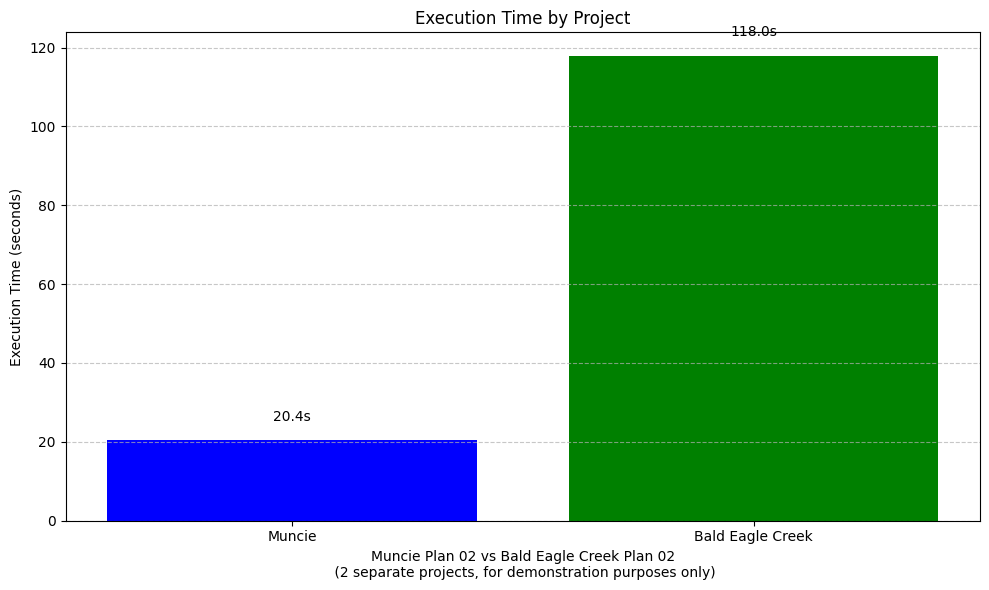

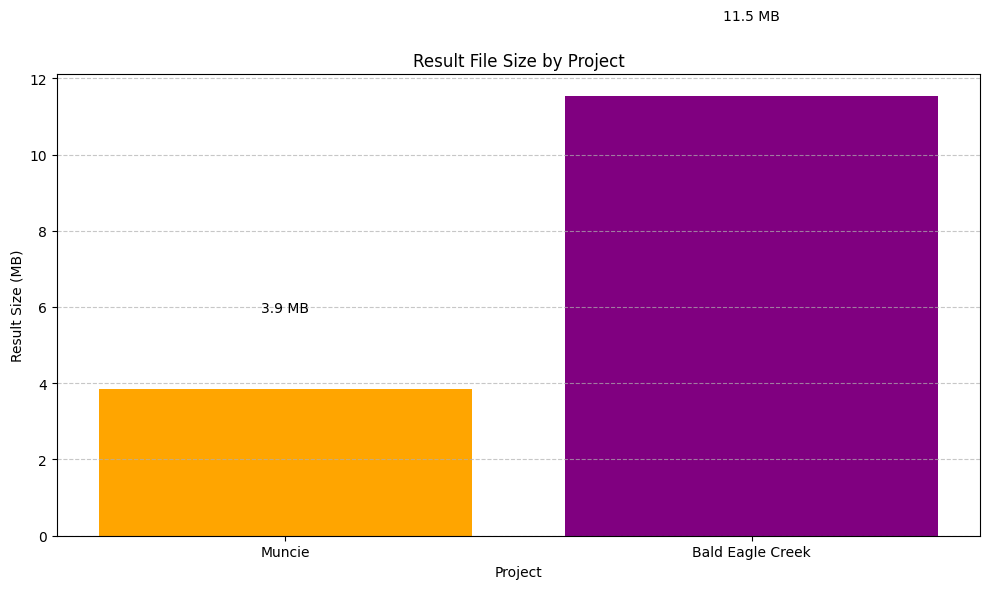

In [12]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results table
print("Execution Results Summary:")
display.display(results_df[['project_name', 'plan_number', 'success', 'duration', 'result_size_mb']])

# Create a bar chart for execution times
plt.figure(figsize=(10, 6))
plt.bar(results_df['project_name'], results_df['duration'], color=['blue', 'green'])
plt.title('Execution Time by Project')
plt.xlabel('Muncie Plan 02 vs Bald Eagle Creek Plan 02\n (2 separate projects, for demonstration purposes only)')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add duration values on top of the bars
for i, duration in enumerate(results_df['duration']):
    plt.text(i, duration + 5, f"{duration:.1f}s", ha='center')

plt.tight_layout()
plt.show()

# If we have result sizes, create a chart for those as well
if results_df['result_size_mb'].notna().any():
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['project_name'], results_df['result_size_mb'], color=['orange', 'purple'])
    plt.title('Result File Size by Project')
    plt.xlabel('Project')
    plt.ylabel('Result Size (MB)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add size values on top of the bars
    for i, size in enumerate(results_df['result_size_mb']):
        if pd.notna(size):
            plt.text(i, size + 2, f"{size:.1f} MB", ha='center')
    
    plt.tight_layout()
    plt.show()

## Step 9: Compare Two HEC-RAS Projects

Let's create a utility function to compare the structures of the two HEC-RAS projects. This helps us understand the differences between the projects we're working with.

Project Structure Comparison:


,Project Name,Plan Count,Geometry Count,Flow Count,Unsteady Count
Bald Eagle Creek,BaldEagle,3,1,2,1
Muncie,Muncie,4,3,1,1


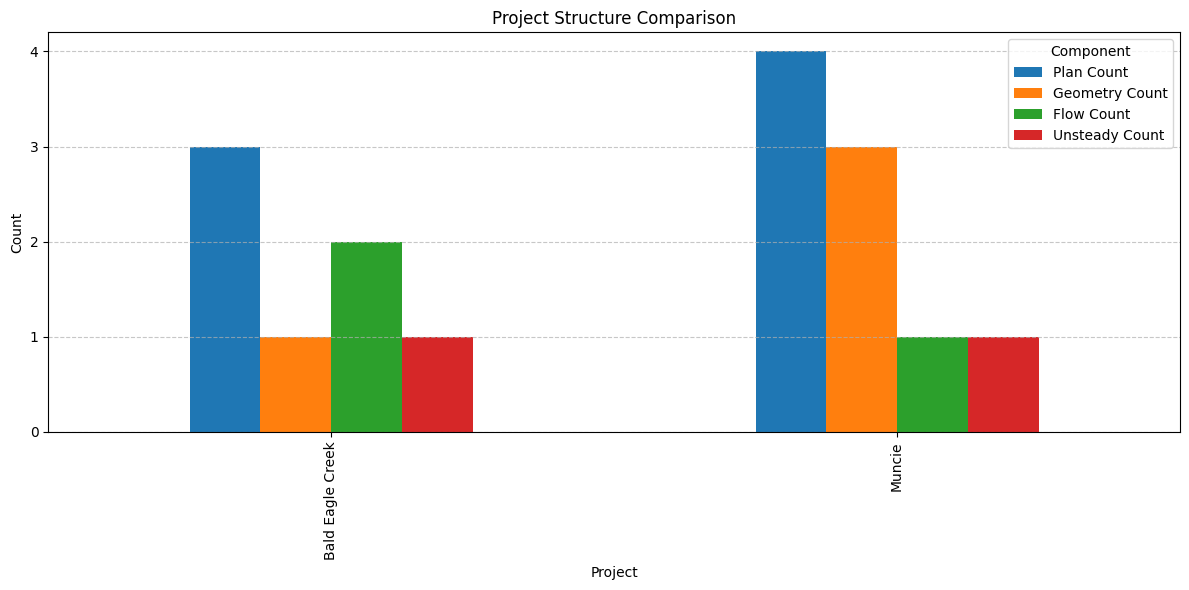

In [13]:
def compare_project_structures(ras_object1, name1, ras_object2, name2):
    """
    Compare the structures of two HEC-RAS projects and display differences.
    """
    # Refresh all dataframes to ensure we have the latest data
    ras_object1.plan_df = ras_object1.get_plan_entries()
    ras_object1.geom_df = ras_object1.get_geom_entries()
    ras_object1.flow_df = ras_object1.get_flow_entries()
    ras_object1.unsteady_df = ras_object1.get_unsteady_entries()
    
    ras_object2.plan_df = ras_object2.get_plan_entries()
    ras_object2.geom_df = ras_object2.get_geom_entries()
    ras_object2.flow_df = ras_object2.get_flow_entries()
    ras_object2.unsteady_df = ras_object2.get_unsteady_entries()
    
    # Create a comparison dictionary
    comparison = {
        'Project Name': [ras_object1.project_name, ras_object2.project_name],
        'Plan Count': [len(ras_object1.plan_df), len(ras_object2.plan_df)],
        'Geometry Count': [len(ras_object1.geom_df), len(ras_object2.geom_df)],
        'Flow Count': [len(ras_object1.flow_df), len(ras_object2.flow_df)],
        'Unsteady Count': [len(ras_object1.unsteady_df), len(ras_object2.unsteady_df)]
    }
    
    # Create a DataFrame for the comparison
    comparison_df = pd.DataFrame(comparison, index=[name1, name2])
    

    # Display the comparison
    print("Project Structure Comparison:")
    display.display(comparison_df)
    
    # Create a bar chart to visualize the comparison
    plt.figure(figsize=(12, 6))
    comparison_df.iloc[:, 1:].plot(kind='bar', ax=plt.gca())
    plt.title('Project Structure Comparison')
    plt.xlabel('Project')
    plt.ylabel('Count')
    plt.legend(title='Component')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Set y-axis to only show whole numbers (integers)
    ax = plt.gca()
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df

# Compare the structures of the two projects
comparison_df = compare_project_structures(
    bald_eagle_ras, "Bald Eagle Creek", 
    muncie_ras, "Muncie"
)

-----

## This approach can also be used to programmatically compare 2 copies of the same project to ensure all of the plan parameters, boundary condition definitions, etc remained the same, and for other QAQC processes.

This will be shown in further examples in more detail.

-----

## Summary of Multiple Project Operations

In this notebook, we've demonstrated how to work with multiple HEC-RAS projects simultaneously using the RAS Commander library. We've covered the following key operations:

1. **Initializing Multiple Projects**: Creating separate RAS objects for different projects
2. **Independent Configuration**: Configuring plans with project-specific parameters
3. **Parallel Execution**: Running computations from different projects simultaneously
4. **Resource Management**: Organizing compute folders and tracking execution statistics
5. **Results Comparison**: Analyzing and comparing results from different projects
6. **Advanced Workflows**: Creating sensitivity plans and batch processing pipelines

### Key Concepts

When working with multiple HEC-RAS projects in RAS Commander, remember these key concepts:

- **Custom RAS Objects**: Create and use separate RAS objects for each project
- **Always Specify ras_object**: Use the `ras_object` parameter in all function calls
- **Separate Compute Folders**: Use separate folders for each project's computations
- **Resource Management**: Be mindful of CPU and memory usage when running in parallel
- **Project Tracking**: Keep track of which results belong to which project

### Multiple Project Applications

Working with multiple projects unlocks advanced applications such as:

1. **Model Comparison**: Compare results from different river systems
2. **Basin-wide Analysis**: Analyze connected river systems in parallel
3. **Parameter Sweep**: Test a range of parameters across multiple models
4. **Model Development**: Develop and test models simultaneously
5. **Batch Processing**: Process large sets of models in an automated pipeline

These capabilities make RAS Commander a powerful tool for large-scale hydraulic modeling and water resources management.